Accuracy KNN sin escalar: 0.650
Accuracy KNN Min-Max:     0.900
Accuracy KNN Z-score:     0.883


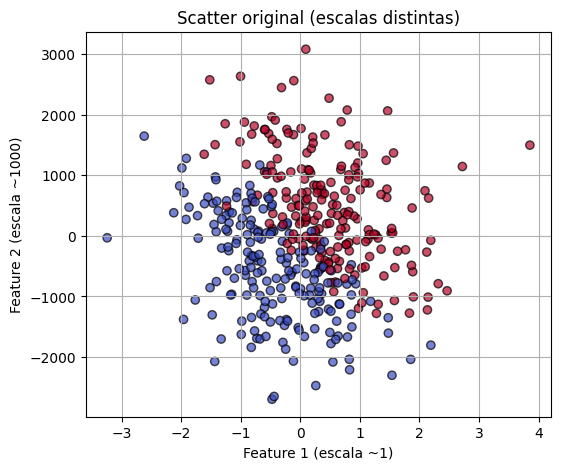

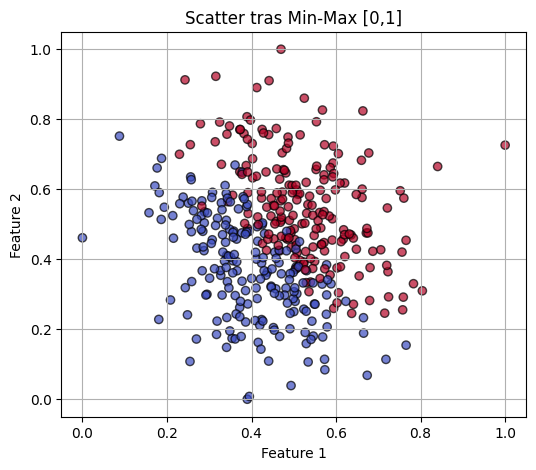

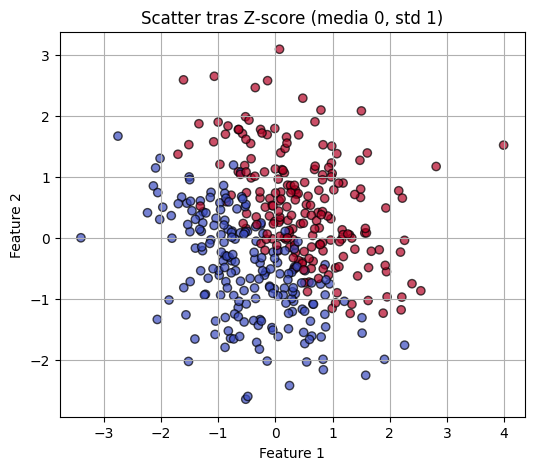

In [1]:
# Demostración donde ESCALAR SÍ importa para KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

rng = np.random.RandomState(42)
n = 400

# Dos features con distinta escala
x1 = rng.normal(0, 1, size=n)          # escala pequeña (p.ej., metros)
x2 = rng.normal(0, 1000, size=n)       # escala grande (p.ej., euros)

# Etiquetas dependen de AMBAS features (misma importancia real)
noise = rng.normal(0, 0.4, size=n)
y = ((x1 + (x2/1000) + noise) > 0).astype(int)

X = np.c_[x1, x2]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# KNN SIN escalar
knn_raw = KNeighborsClassifier(n_neighbors=7)
acc_raw = accuracy_score(y_test, knn_raw.fit(X_train, y_train).predict(X_test))

# KNN con Min-Max (pipeline para evitar leakage)
knn_mm = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=7))
acc_mm = accuracy_score(y_test, knn_mm.fit(X_train, y_train).predict(X_test))

# KNN con Z-score (pipeline)
knn_z = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7))
acc_z = accuracy_score(y_test, knn_z.fit(X_train, y_train).predict(X_test))

print(f"Accuracy KNN sin escalar: {acc_raw:.3f}")
print(f"Accuracy KNN Min-Max:     {acc_mm:.3f}")
print(f"Accuracy KNN Z-score:     {acc_z:.3f}")

# --- Gráficos (una figura por gráfico, sin seaborn) ---
# Original
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.7)
plt.title("Scatter original (escalas distintas)")
plt.xlabel("Feature 1 (escala ~1)")
plt.ylabel("Feature 2 (escala ~1000)")
plt.grid(True)
plt.show()

# Min-Max
X_mm = MinMaxScaler().fit_transform(X)
plt.figure(figsize=(6,5))
plt.scatter(X_mm[:,0], X_mm[:,1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.7)
plt.title("Scatter tras Min-Max [0,1]")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# Z-score
X_z = StandardScaler().fit_transform(X)
plt.figure(figsize=(6,5))
plt.scatter(X_z[:,0], X_z[:,1], c=y, cmap="coolwarm", edgecolor="k", alpha=0.7)
plt.title("Scatter tras Z-score (media 0, std 1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()